 # **The Sparks Foundation**
 # Task 1- Prediction using Supervised ML
 # By- Roshan Kumar
 Predicting score of the student if the student studies for 9.25 hours/day
 
 __Dataset:-(http://bit.ly/w-data)__


In [1]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing and reading the first 5 values of dataset
url="http://bit.ly/w-data"
data=pd.read_csv(url)
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
# Number of rows and columns
data.shape

(25, 2)

In [4]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Data Visualization

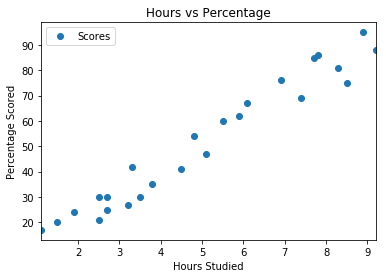

In [6]:
# Hours VS Percentage plot of Scores 
data.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')
plt.show()

# Train-Test Split

In [7]:
# Spliting the Dataset
# x will take all the values except the last
x=data.iloc[:,:-1].values
y=data.iloc[:,1].values

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

# Training Linear Regression on Training Set

In [9]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
print(reg.coef_)

[9.78856669]


In [11]:
print(reg.intercept_)

2.3708153823418883


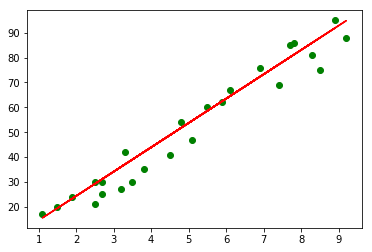

In [12]:
# For plotting the regression line
line = reg.coef_*x+reg.intercept_+reg.intercept_
# Plotting the test data
plt.scatter(x,y,color='green')
plt.plot(x, line,color='red');
plt.show()

# Making Predictions

In [13]:
# Test dataset with their predicted values
print(x_test)
y_pred=reg.predict(x_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]
[17.05366541 33.69422878 74.80620886 26.8422321  60.12335883 39.56736879
 20.96909209 78.72163554]


Text(0, 0.5, 'Percentage Scored')

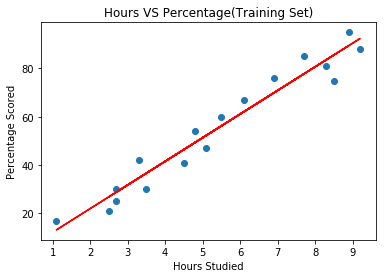

In [14]:
# Visualizing the training set result
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),color='red')
plt.title('Hours VS Percentage(Training Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

Text(0, 0.5, 'Percentage Scored')

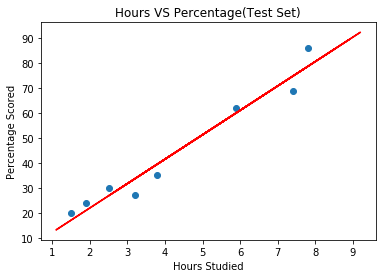

In [15]:
# Visualizing the test set results
plt.scatter(x_test,y_test)
plt.plot(x_train,reg.predict(x_train),color='red')
plt.title('Hours VS Percentage(Test Set)')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

In [16]:
# Comparing the actual values with predicted values
df=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [17]:

hours = np.array(9.25)
hours = hours.reshape(1,-1)
own_pred = reg.predict(hours)
print("Studying for 9.25 hours/day may help to score {}".format(own_pred[0]))

Studying for 9.25 hours/day may help to score 92.91505723477056


# Evalution Metrics

In [18]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.419727808027651


In [19]:
from sklearn.metrics import r2_score
print('Root Mean Squared Error is:',r2_score(y_test,y_pred))

Root Mean Squared Error is: 0.9568211104435257
